<a href="https://colab.research.google.com/github/Jkia65/Assignment-3-Python-Refresher/blob/main/Assignment_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 8

Step 1: Dataset Selection and Preprocessing

In [16]:

# Importants labraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
df = pd.read_csv('real_estate.csv')

# Quick look at the data
df.head()

,No,house age,distance to the nearest MRT station,number of convenience stores,latitude,longitude,house price of unit area
0,1,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,5.0,390.56840,5,24.97937,121.54245,43.1


In [17]:
# Data Info and Shape
print(df.info())
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   No                                   414 non-null    int64  
 1   house age                            414 non-null    float64
 2   distance to the nearest MRT station  414 non-null    float64
 3   number of convenience stores         414 non-null    int64  
 4   latitude                             414 non-null    float64
 5   longitude                            414 non-null    float64
 6   house price of unit area             414 non-null    float64
dtypes: float64(5), int64(2)
memory usage: 22.8 KB
None
(414, 7)


In [18]:
# Data Cleaning
# Check for missing values
print(df.isnull().sum()) # No missing or duplicated values found


No                                     0
house age                              0
distance to the nearest MRT station    0
number of convenience stores           0
latitude                               0
longitude                              0
house price of unit area               0
dtype: int64


In [19]:
# Feature/Target Selection
X = df[['house age', 'distance to the nearest MRT station', 'number of convenience stores',
        'latitude', 'longitude']]  # Independent features
y = df['house price of unit area']  # Target variable

In [20]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (optional but helpful for some models)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Step 2: Exploratory Data Analysis (EDA)

In [21]:
# Basic statistics
print(df.describe())

               No   house age  distance to the nearest MRT station  \
count  414.000000  414.000000                           414.000000   
mean   207.500000   17.712560                          1083.885689   
std    119.655756   11.392485                          1262.109595   
min      1.000000    0.000000                            23.382840   
25%    104.250000    9.025000                           289.324800   
50%    207.500000   16.100000                           492.231300   
75%    310.750000   28.150000                          1454.279000   
max    414.000000   43.800000                          6488.021000   

       number of convenience stores    latitude   longitude  \
count                    414.000000  414.000000  414.000000   
mean                       4.094203   24.969030  121.533361   
std                        2.945562    0.012410    0.015347   
min                        0.000000   24.932070  121.473530   
25%                        1.000000   24.963000  121.5

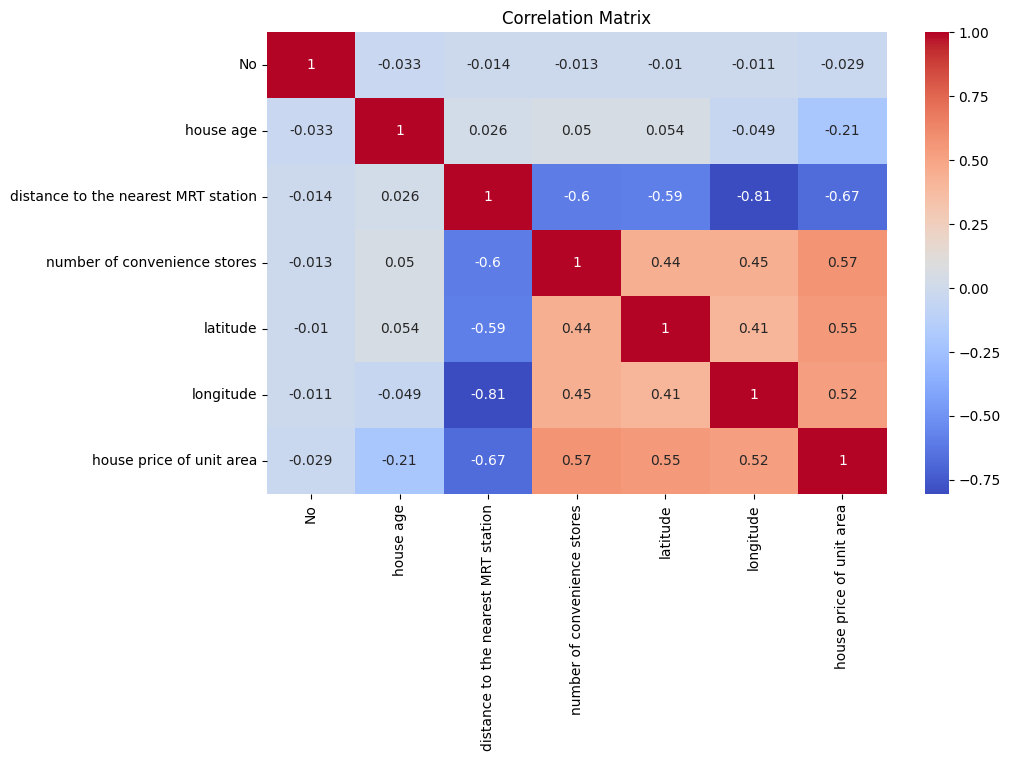

In [22]:
# Correlation matrix
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

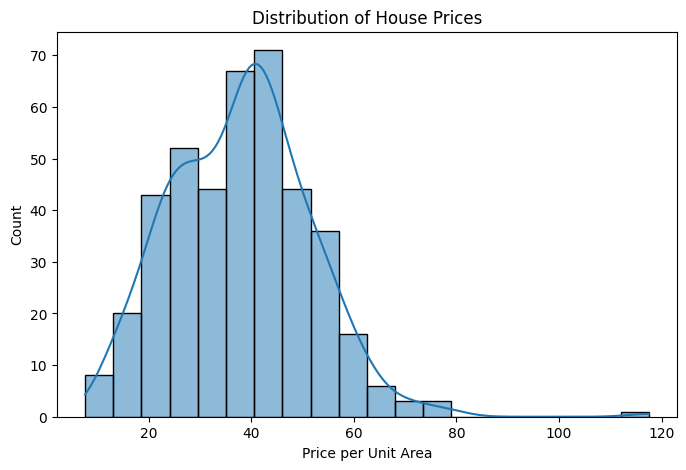

In [23]:
# Distribution of target variable
plt.figure(figsize=(8,5))
sns.histplot(df['house price of unit area'], kde=True, bins=20)
plt.title('Distribution of House Prices')
plt.xlabel('Price per Unit Area')
plt.show()

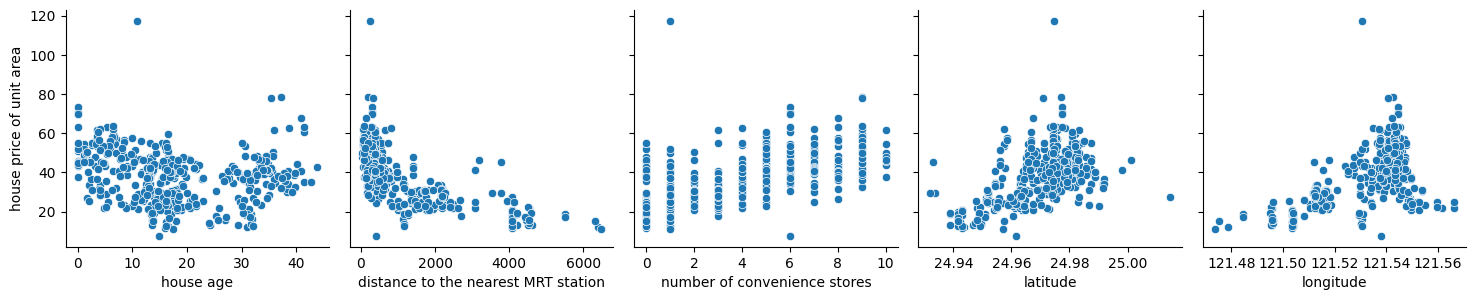

In [24]:
# Pairplot to visualize feature-target relationships
sns.pairplot(df, x_vars=['house age', 'distance to the nearest MRT station',
                         'number of convenience stores', 'latitude', 'longitude'],
             y_vars='house price of unit area', height=3, aspect=1, kind='scatter')
plt.show()

Step 3: Model Implementation and Evaluation

In [25]:
# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

y_pred_lr = lr_model.predict(X_test_scaled)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression - MSE:", mse_lr, "R2:", r2_lr)

Linear Regression - MSE: 54.58094520086212 R2: 0.6746481382828176


In [26]:
# Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest - MSE:", mse_rf, "R2:", r2_rf)

Random Forest - MSE: 34.60981792762854 R2: 0.7936941426168487


Step 4: Model Interpretation and Inference

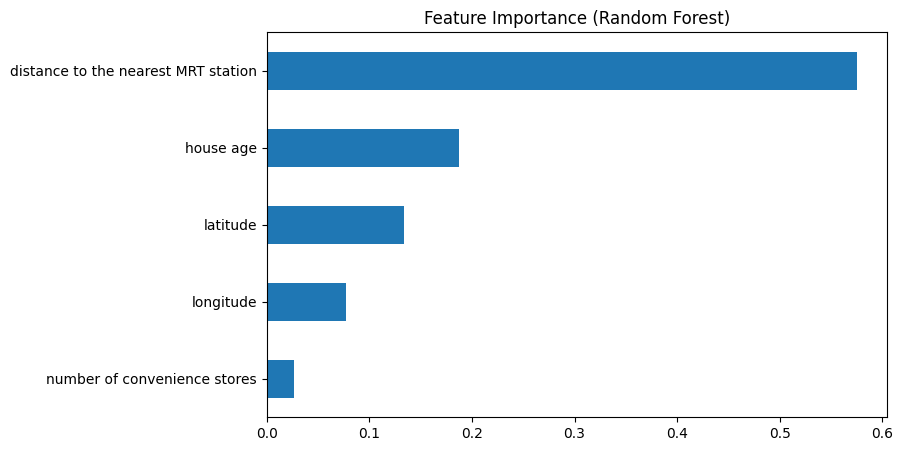

In [27]:
# Feature importance for Random Forest
feat_importance = pd.Series(rf_model.feature_importances_, index=X.columns)
feat_importance.sort_values().plot(kind='barh', figsize=(8,5))
plt.title('Feature Importance (Random Forest)')
plt.show()

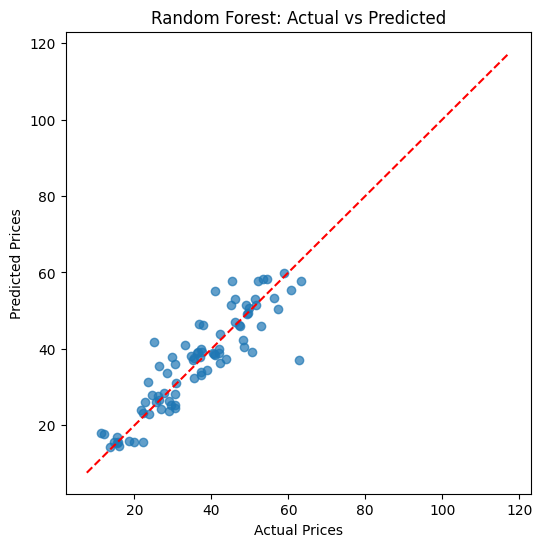

In [28]:
# Scatter plot of actual vs predicted
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_rf, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Random Forest: Actual vs Predicted')
plt.show()